# Quant trading analysis

## Preparation: 

Purchase and register API Key here with your email address:
https://www.alphavantage.co/

And  
```
pip install alpha_vantage
```
So you can use the Python API with your key.

In [1]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
# Initialize the TimeSeries object with your API key
api_key = "your api key"

There can be a limit of querying data for 5 stocks every minute, so need to  split into 2 cells to run:

In [3]:
# Define the symbols of the 10 most famous stocks
symbol_list_1 = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']
symbol_list_2 = ['TSLA', 'NVDA', 'JPM', 'V', 'JNJ']
symbol_list = symbol_list_1 + symbol_list_2

In [4]:
# Initialize the TimeSeries object with your API key
ts = TimeSeries(key=api_key)

# Create an empty DataFrame to store the prices
df_1 = pd.DataFrame()

# Retrieve the EOD adjusted prices for each stock and append to the DataFrame
for symbol in symbol_list_1:
    # Call the API to get the historical prices
    data, _ = ts.get_daily_adjusted(symbol=symbol, outputsize='full')
    
    # Extract the adjusted close prices from the data dictionary
    prices = {date: price_data['5. adjusted close'] for date, price_data in data.items()}
    
    # Create a temporary DataFrame for the current stock
    temp_df = pd.DataFrame.from_dict(prices, orient='index', columns=[symbol])
    
    # Append the temporary DataFrame to the main DataFrame
    df_1 = pd.concat([df_1, temp_df], axis=1)

**Run the cell below 1 minute later:**

In [5]:
# Create an empty DataFrame to store the prices
df_2 = pd.DataFrame()

# Retrieve the EOD adjusted prices for each stock and append to the DataFrame
for symbol in symbol_list_2:
    # Call the API to get the historical prices
    data, _ = ts.get_daily_adjusted(symbol=symbol, outputsize='full')
    
    # Extract the adjusted close prices from the data dictionary
    prices = {date: price_data['5. adjusted close'] for date, price_data in data.items()}
    
    # Create a temporary DataFrame for the current stock
    temp_df = pd.DataFrame.from_dict(prices, orient='index', columns=[symbol])
    
    # Append the temporary DataFrame to the main DataFrame
    df_2 = pd.concat([df_2, temp_df], axis=1)

Combine data together:

In [6]:
ts = df_1.merge(df_2, left_index=True, right_index=True).dropna().astype(np.float32)

In [7]:
ts

,AAPL,MSFT,AMZN,GOOGL,META,TSLA,NVDA,JPM,V,JNJ
2023-07-03,192.460007,337.989990,130.220001,119.900002,286.019989,279.820007,424.130005,146.610001,237.970001,163.350006
2023-06-30,193.970001,340.540009,130.360001,119.699997,286.980011,261.769989,423.019989,145.440002,237.479996,165.520004
2023-06-29,189.589996,335.049988,127.900002,119.099998,281.529999,257.500000,408.220001,143.429993,234.320007,164.100006
2023-06-28,189.250000,335.850006,129.039993,120.180000,285.290009,256.239990,411.170013,138.589996,227.960007,162.960007
2023-06-27,188.059998,334.570007,129.179993,118.330002,287.049988,250.210007,418.760010,139.199997,227.339996,163.289993
...,...,...,...,...,...,...,...,...,...,...
2012-05-24,17.158182,23.506090,10.762000,15.138230,33.029999,2.021333,2.778126,24.959030,27.658508,46.536488
2012-05-23,17.317223,23.538433,10.864000,15.283679,32.000000,2.068000,2.853831,25.172104,27.519951,46.215092
2012-05-22,16.904749,24.064026,10.766500,15.066509,31.000000,2.052667,2.785008,24.988419,27.339825,46.397701
2012-05-21,17.035563,24.055939,10.905500,15.400290,34.029999,1.918000,2.819419,23.886312,26.838705,46.361179


#### Without purchasing, you can use the data we provide here:

In [2]:
## Load data directly from csv file
ts = pd.read_csv("stock prices.csv", index_col=0)[::-1]

In [3]:
ts.index = pd.to_datetime(ts.index)
ts.index.name = 'date'

In [4]:
ts.head()

,AAPL,MSFT,AMZN,GOOGL,META,TSLA,NVDA,JPM,V,JNJ
date,,,,,,,,,,
2012-05-18,16.097710,23.667810,10.6925,15.056478,38.2318,1.837333,2.771244,24.606356,26.011976,46.273525
2012-05-21,17.035563,24.055939,10.9055,15.400290,34.0300,1.918000,2.819419,23.886312,26.838705,46.361180
2012-05-22,16.904749,24.064026,10.7665,15.066509,31.0000,2.052667,2.785008,24.988419,27.339825,46.397700
2012-05-23,17.317223,23.538433,10.8640,15.283679,32.0000,2.068000,2.853831,25.172104,27.519950,46.215090
2012-05-24,17.158182,23.506090,10.7620,15.138230,33.0300,2.021333,2.778126,24.959030,27.658508,46.536488


In [5]:
ts.query("index=='2018-01-02'")

,AAPL,MSFT,AMZN,GOOGL,META,TSLA,NVDA,JPM,V,JNJ
date,,,,,,,,,,
2018-01-02,40.82955,80.54409,59.4505,53.6605,181.42,21.368668,49.32139,91.96128,110.375336,120.205025


## Single stock selection:

First step for us is to know about each single stock and pick one to invest on.

Since we have loaded time series, let's have a look at the historical performance.

In order for fair comparison, we normalize the starting point in the same.

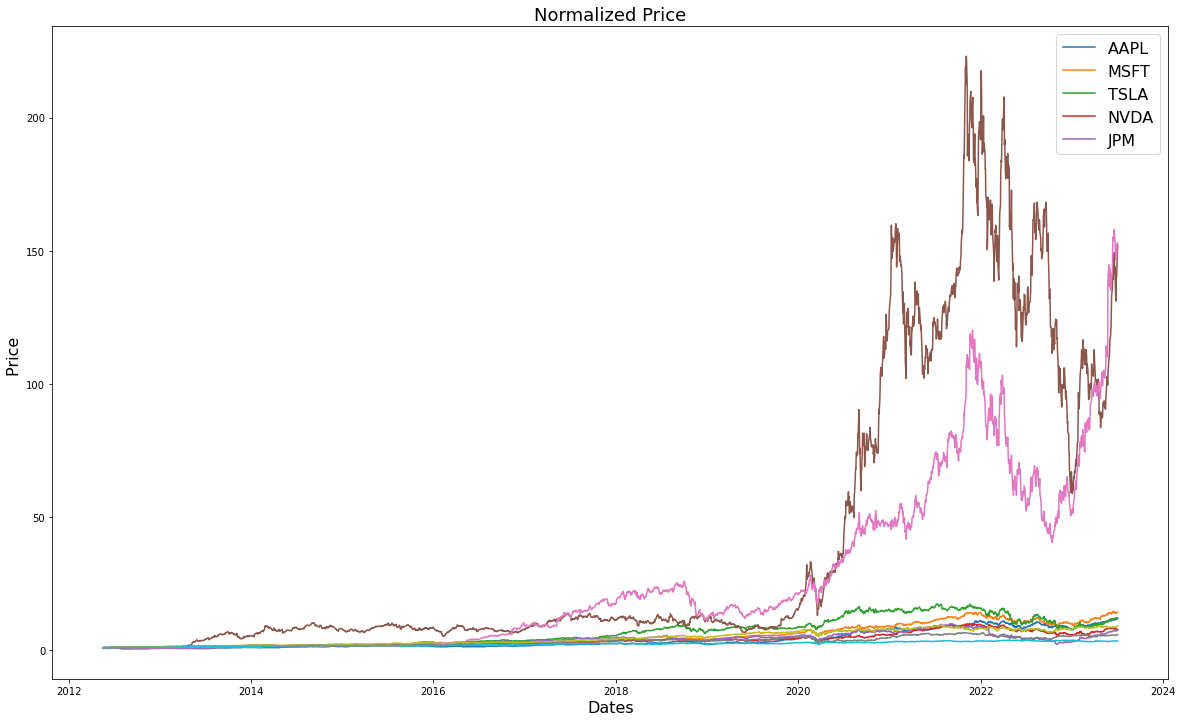

In [6]:
normalized_price = (ts/ts.iloc[0])
fig =plt.figure(figsize=(20,12))
plt.plot(normalized_price)
title_text_obj = plt.title("Normalized Price", fontsize = 18)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Price ', fontsize = 16)
plt.legend(('AAPL', 'MSFT', 'TSLA', 'NVDA', 'JPM' ),fontsize = 16,loc = 'best')
plt.show()

### Stock Return

Price change is what matters most in our study, we need to calculate the daily price change based on pandas methods.

In [13]:
AAPL_return = ts['AAPL'].pct_change(-1)
AAPL_return.head()

date
2023-07-03   -0.007785
2023-06-30    0.023103
2023-06-29    0.001797
2023-06-28    0.006328
2023-06-27    0.015059
Name: AAPL, dtype: float32

In [14]:
returns = ts.pct_change(-1)

In [15]:
ts.pct_change(-1)

,AAPL,MSFT,AMZN,GOOGL,META,TSLA,NVDA,JPM,V,JNJ
date,,,,,,,,,,
2023-07-03,-0.007785,-0.007488,-0.001074,0.001671,-0.003345,0.068954,0.002624,0.008045,0.002063,-0.013110
2023-06-30,0.023103,0.016386,0.019234,0.005038,0.019359,0.016582,0.036255,0.014014,0.013486,0.008653
2023-06-29,0.001797,-0.002382,-0.008834,-0.008987,-0.013180,0.004917,-0.007175,0.034923,0.027900,0.006996
2023-06-28,0.006328,0.003826,-0.001084,0.015634,-0.006131,0.024100,-0.018125,-0.004382,0.002727,-0.002021
2023-06-27,0.015059,0.018168,0.014529,-0.000084,0.030811,0.038000,0.030616,0.000072,0.004596,-0.002078
...,...,...,...,...,...,...,...,...,...,...
2012-05-24,-0.009184,-0.001374,-0.009389,-0.009517,0.032187,-0.022566,-0.026527,-0.008465,0.005035,0.006954
2012-05-23,0.024400,-0.021841,0.009056,0.014414,0.032258,0.007470,0.024712,0.007351,0.006588,-0.003936
2012-05-22,-0.007679,0.000336,-0.012746,-0.021674,-0.089039,0.070212,-0.012205,0.046140,0.018672,0.000788


#### Mathematical modelling for returns:

+ Now we hve $N$ stocks，and the $i-th$ stock has return $R_i$ with expectation $r_i$. We can define a vector of random variables:

 $${R}=\left( \begin{array}{c}R_1\\ \vdots\\R_N\end{array}\right)$$
 
Take expectation on both sides:
 
 $$E({R})=\left( \begin{array}{c} E(R_1)\\ \vdots\\E(R_N)\end{array}\right)$$
 
 In statistics, we can use average/mean to estimate expectation,and *252 (as number of trading days per year) to annualized the number:
 
 $$\hat{E({R})} = \left( \begin{array}{c} \bar{R_1}\\ \vdots\\\bar{R_N}\end{array}\right) $$

In [16]:
returns.mean().to_frame()*252

,0
AAPL,0.265065
MSFT,0.275583
AMZN,0.277718
GOOGL,0.223551
META,0.263762
TSLA,0.613930
NVDA,0.551525
JPM,0.196462
V,0.229802
JNJ,0.128613


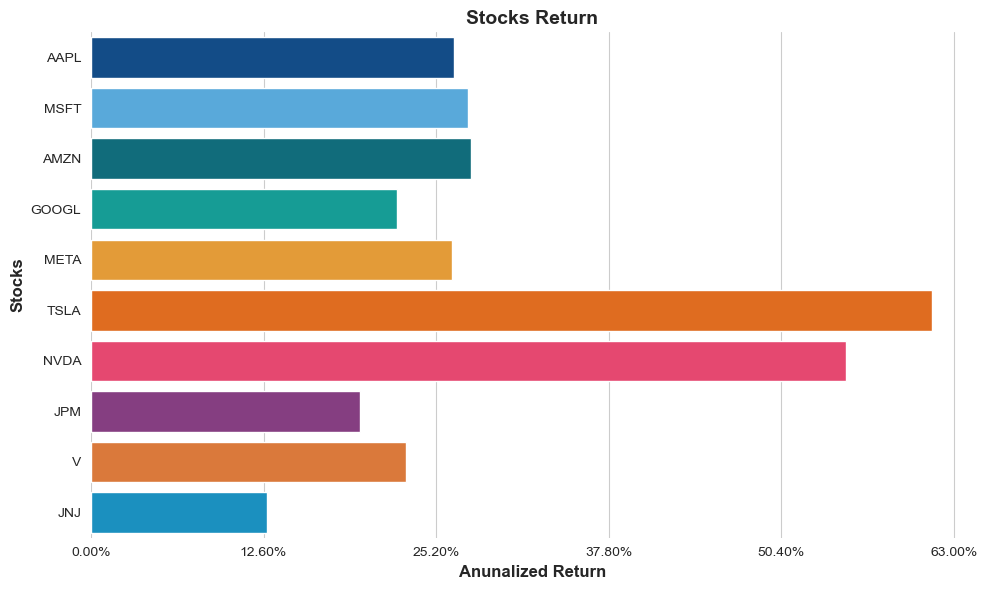

In [17]:
# Set custom style using Seaborn
sns.set_style("whitegrid")

# Define custom colors
colors = ['#004C9A', '#44AEEF', '#00798C', '#00B2A9', '#FF9F1C', '#FF6500', '#FF2E63', '#91328C', '#F47321', '#009CDA']

# Set up the plot
plt.figure(figsize=(10, 6))
_r = returns.mean().to_frame().rename(columns = {0:'Return'})
ax = sns.barplot(x=_r['Return'], y=_r.index, data=_r, palette=colors)

# Customize the plot
ax.set_xlabel('Anunalized Return', fontsize=12, fontweight='bold', fontfamily='Arial')
ax.set_ylabel('Stocks', fontsize=12, fontweight='bold', fontfamily='Arial')
ax.set_title('Stocks Return', fontsize=14, fontweight='bold', fontfamily='Arial')


# Add data labels to the bars
for i, row in enumerate(_r.itertuples()):
    ax.text(row.Return, i, f"{row.Return:.1f}", va='center', fontsize=10, fontweight='bold', color='white')

# Remove spines
sns.despine(left=True, bottom=True)

# Customize tick labels
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100*252:.2f}%'))

# Adjust the spacing
plt.tight_layout()

# Display the plot
plt.show()

### Stock Volatility

+ Here we use standard deviation to measure volatility.

+ For daily volatility, we can use formula below to calculate:
$$ std = \sqrt{\sum_{i=1}^{N}(x_i - \bar{x})^2 / (N-1)}$$

+ To convert daily volatility to annualized volatility, we need to multiply the standard deviation by square root of 252 (usually we assume market is open for 252 days per year).

$$ Annualized std = std * \sqrt{252} $$

+ For example, we calculate the annualized volatility for Apple:

In [18]:
ONEYEARDAYS = 252
AAPL_std = AAPL_return.std() * np.sqrt(ONEYEARDAYS)
AAPL_std

0.287610306767736

In [19]:
stocks_std = ts.pct_change(-1).std().apply(lambda x: x*np.sqrt(252) )
stocks_std

AAPL     0.287610
MSFT     0.268052
AMZN     0.324278
GOOGL    0.270972
META     0.405671
TSLA     0.568732
NVDA     0.444878
JPM      0.267202
V        0.246419
JNJ      0.172749
dtype: float64

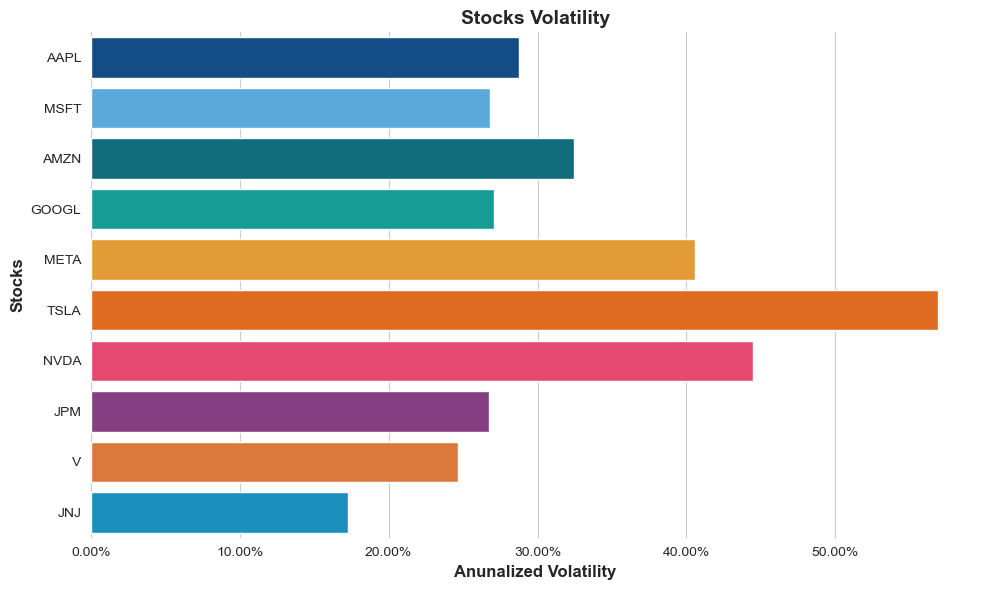

In [20]:
# Set custom style using Seaborn
sns.set_style("whitegrid")

# Define custom colors
colors = ['#004C9A', '#44AEEF', '#00798C', '#00B2A9', '#FF9F1C', '#FF6500', '#FF2E63', '#91328C', '#F47321', '#009CDA']

# Set up the plot
plt.figure(figsize=(10, 6))
_std = stocks_std.to_frame().rename(columns = {0:'Volatility'})
ax = sns.barplot(x=_std['Volatility'], y=_std.index, data=_std, palette=colors)

# Customize the plot
ax.set_xlabel('Anunalized Volatility', fontsize=12, fontweight='bold', fontfamily='Arial')
ax.set_ylabel('Stocks', fontsize=12, fontweight='bold', fontfamily='Arial')
ax.set_title('Stocks Volatility', fontsize=14, fontweight='bold', fontfamily='Arial')



# Remove spines
sns.despine(left=True, bottom=True)

# Customize tick labels
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.2f}%'))

# Adjust the spacing
plt.tight_layout()

# Display the plot
plt.show()

### Skewness and kurtosis:

+ Other risk measure for return distribution:

$Skewness = E\left[\left(\frac{X -\mu}{\sigma(X)}\right)^3\right]$

$Kurtosis = E\left[\left(\frac{X -\mu}{\sigma(X)}\right)^4\right]$

In [21]:
stocks_std

AAPL     0.287610
MSFT     0.268052
AMZN     0.324278
GOOGL    0.270972
META     0.405671
TSLA     0.568732
NVDA     0.444878
JPM      0.267202
V        0.246419
JNJ      0.172749
dtype: float64

Text(0.5, 1.0, 'AAPL return statistics')

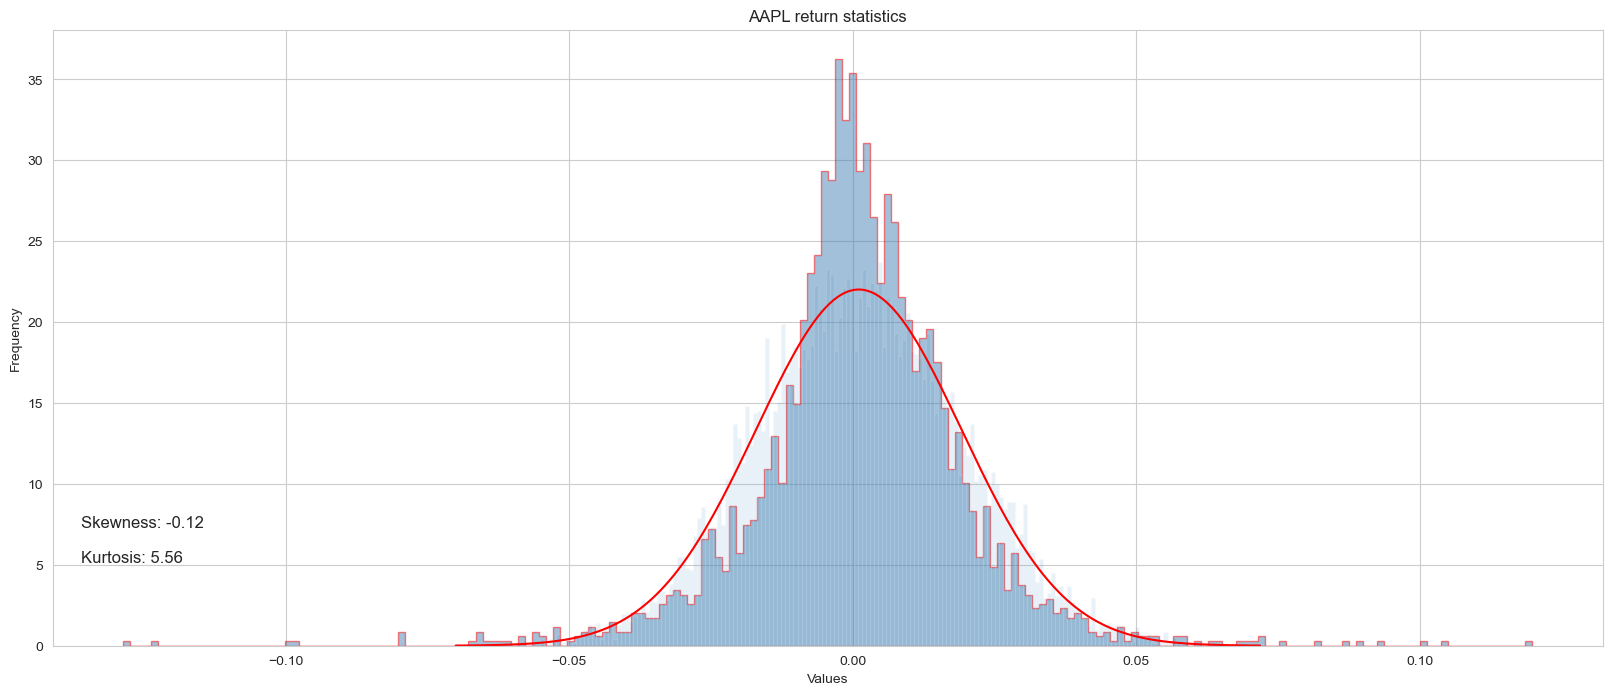

In [22]:
binsnumber = 200
fig, ax = plt.subplots(figsize=(20,8))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots

## AAPL
tickname = 'AAPL'
plt.subplot()
ax = plt.gca()
ax.hist(returns[tickname], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns[tickname].std(),returns[tickname].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(str(round(returns[tickname].skew(),2)),
                                                  str(round(returns[tickname].kurtosis(),2))),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('{} return statistics'.format(tickname))

Text(0.5, 1.0, 'TSLA return statistics')

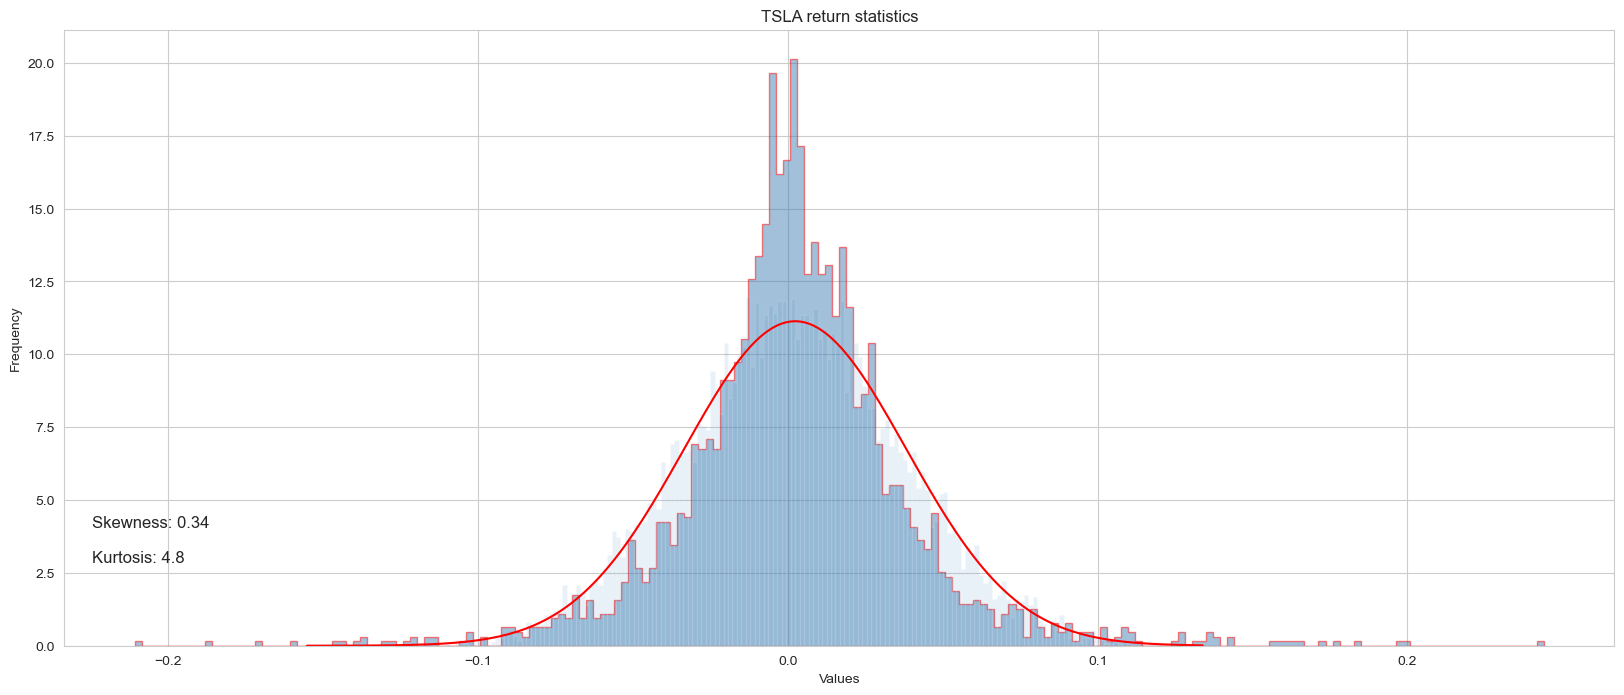

In [23]:
binsnumber = 200
fig, ax = plt.subplots(figsize=(20,8))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots

## TSLA     
tickname = 'TSLA'
plt.subplot()
ax = plt.gca()
ax.hist(returns[tickname], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns[tickname].std(),returns[tickname].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(str(round(returns[tickname].skew(),2)),
                                                  str(round(returns[tickname].kurtosis(),2))),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('{} return statistics'.format(tickname))

### Which is the key metrics for us to pick one single stock?

#### Sharpe Ratio
$$\frac{R_p - R_f }{\sigma_p}$$

Where
+ $R_p$ is the return of the portfolio
+ $R_f$ is the risk-free rate, here for simplicity we take it as 0.

In [24]:
stats = pd.DataFrame()
stats['Annualized Returns(%)']    = np.round(returns.mean() * ONEYEARDAYS *100,2)
stats['Annualized Volatility(%)'] = np.round(returns.std() * np.sqrt(ONEYEARDAYS)*100,2)
stats['Sharpe Ratio'] = np.round(stats['Annualized Returns(%)'] /stats['Annualized Volatility(%)'],2)
stats.style.bar(color=['red','green'], align='zero')

,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
AAPL,26.510000,28.760000,0.920000
MSFT,27.559999,26.809999,1.030000
AMZN,27.770000,32.430000,0.860000
GOOGL,22.360001,27.100000,0.830000
META,26.379999,40.570000,0.650000
TSLA,61.389999,56.869999,1.080000
NVDA,55.150002,44.490002,1.240000
JPM,19.650000,26.719999,0.740000
V,22.980000,24.639999,0.930000
JNJ,12.860000,17.270000,0.740000


## What if we go beyond one single stock? 

### Covariance and correlation

+ If we consider multiple stocks, we also need to consider the covariance between each stock.
$$\Omega=Cov(R)$$



+ Let $\Omega_{ij}$ be the covariance of $R_i$ and $R_j$, $\Omega_{ij}=Cov(R_i,R_j)$, $\sigma_i=\sqrt{\Omega_{ii}}$ is the standard deviation (std) of $R_i$. 

In [25]:
cov_matrix = returns.cov()
cov_matrix

,AAPL,MSFT,AMZN,GOOGL,META,TSLA,NVDA,JPM,V,JNJ
AAPL,0.000328,0.000187,0.000185,0.000174,0.000202,0.000240,0.000263,0.000124,0.000145,0.000068
MSFT,0.000187,0.000285,0.000205,0.000197,0.000201,0.000223,0.000278,0.000129,0.000156,0.000076
AMZN,0.000185,0.000205,0.000417,0.000218,0.000260,0.000269,0.000277,0.000105,0.000148,0.000060
GOOGL,0.000174,0.000197,0.000218,0.000291,0.000239,0.000217,0.000253,0.000122,0.000150,0.000068
META,0.000202,0.000201,0.000260,0.000239,0.000653,0.000260,0.000298,0.000126,0.000163,0.000064
TSLA,0.000240,0.000223,0.000269,0.000217,0.000260,0.001284,0.000386,0.000151,0.000175,0.000054
NVDA,0.000263,0.000278,0.000277,0.000253,0.000298,0.000386,0.000785,0.000170,0.000206,0.000072
JPM,0.000124,0.000129,0.000105,0.000122,0.000126,0.000151,0.000170,0.000283,0.000149,0.000077
V,0.000145,0.000156,0.000148,0.000150,0.000163,0.000175,0.000206,0.000149,0.000241,0.000076
JNJ,0.000068,0.000076,0.000060,0.000068,0.000064,0.000054,0.000072,0.000077,0.000076,0.000118


+ Also correlation matrix:

In [26]:
returns.corr()

,AAPL,MSFT,AMZN,GOOGL,META,TSLA,NVDA,JPM,V,JNJ
AAPL,1.000000,0.611935,0.499963,0.563688,0.437003,0.370477,0.517858,0.405142,0.517059,0.346171
MSFT,0.611935,1.000000,0.594369,0.683318,0.466169,0.368050,0.588509,0.454986,0.594486,0.413085
AMZN,0.499963,0.594369,1.000000,0.624359,0.497375,0.368052,0.484700,0.304931,0.467368,0.270441
GOOGL,0.563688,0.683318,0.624359,1.000000,0.547953,0.355271,0.529258,0.424063,0.566071,0.363800
META,0.437003,0.466169,0.497375,0.547953,1.000000,0.284316,0.416358,0.293388,0.411140,0.228770
TSLA,0.370477,0.368050,0.368052,0.355271,0.284316,1.000000,0.384549,0.250240,0.315410,0.139412
NVDA,0.517858,0.588509,0.484700,0.529258,0.416358,0.384549,1.000000,0.360441,0.474218,0.235441
JPM,0.405142,0.454986,0.304931,0.424063,0.293388,0.250240,0.360441,1.000000,0.569318,0.421052
V,0.517059,0.594486,0.467368,0.566071,0.411140,0.315410,0.474218,0.569318,1.000000,0.450159
JNJ,0.346171,0.413085,0.270441,0.363800,0.228770,0.139412,0.235441,0.421052,0.450159,1.000000


### Let's start from 2 stocks:


Suppose two stocks have expected ***daily return*** as $r_1$ and $r_2$
    
And we allocate different weights to them as $w_1$ and $w_2$ where $w_1 + w_2 = 1$

Then the combination can have expected return as of : $$E(r_c) = w_1r_1 + w_2r_2$$

In order to calculate the combination's volatility (variance & standard deviation), we need to take their correlation $\rho_{12}$ and volatility $\sigma_1,\sigma_2$ into consideration. ***All as daily***

$$\sigma_{r_c}^2=w_1^2\sigma_1^2+w_2^2\sigma_2^2+2w_1w_2\rho_{12}\sigma_1\sigma_2$$



####  Take AAPL and JNJ as an example:
Annualized return and standard deviation of two stocks:

In [27]:
returns.mean()*252

AAPL     0.265065
MSFT     0.275583
AMZN     0.277718
GOOGL    0.223551
META     0.263762
TSLA     0.613930
NVDA     0.551525
JPM      0.196462
V        0.229802
JNJ      0.128613
dtype: float32

In [28]:
ts.pct_change(-1).std()*np.sqrt(252)

AAPL     0.287610
MSFT     0.268052
AMZN     0.324278
GOOGL    0.270972
META     0.405671
TSLA     0.568732
NVDA     0.444878
JPM      0.267202
V        0.246419
JNJ      0.172749
dtype: float32

Now we have $$ r_1=0.265065, r_2=0.551525,\sigma_1=0.287610,\sigma_2=0.172749,\rho_{12}=0.346171$$

Entire problem would become:

In [29]:
r1=0.265065;
r2=0.128613;
sig1=0.287610;
sig2=0.172749;
rho12=0.346171

In [30]:
import sympy as sy
from sympy.interactive import printing

printing.init_printing(use_latex=True)
## w for w_1, where w_2 = 1- w_1 = 1- w
w=sy.symbols('w',positive = True, real = True)

## expected return of 2 stocks combination:
r_c =w*r1+(1-w)*r2

variance_c = sy.simplify(sig1**2*w**2+sig2**2*(1-w)**2+2*w*(1-w)*rho12*sig1*sig2)
std_c =sy.sqrt(variance_c)

sy.simplify(r_c), sy.simplify(std_c)

In [31]:
def get_two_stocks_std(w):
    return np.sqrt(sig1**2*w**2+sig2**2*(1-w)**2+2*w*(1-w)*rho12*sig1*sig2)

def get_two_stocks_return(w):
    return w*r1+(1-w)*r2


#### <span style="color:darkred">*Exercise*:
Scipy is a package for doing scientific computation which supports linear algebra, signal processing, optimization etc.

https://docs.scipy.org/doc/scipy/reference/optimize.html 
    this is a reference for doing optimization with scipy.
    
Try to use scipy to optimize the quadratic function above.
</span>

In [36]:
from scipy.optimize import minimize

## Fill your code here:

#### <span style="color:darkred">*Exercise*:
If the value of w keeps changing, the value of return and std of the two-stock combination would be a parametric curve of w.
Please try to plot the curve.
</span>

**Hint: compare with multiple stocks plot to validate answer**

In [38]:
## Fill your code here

#### Here we can see the relationship between return and standard deviation when we combine 2 stocks together. Such combination is also called ***Portfolio***.

***Portfolio*** can variant based on the weights we allocate to different stocks. And we can find that there exists one point when the std of the portfolio is at its minimum.

And the green part of the line is called **"Efficient Frontier"**

### Portfolio of multiple stocks

+ Let $w_i$ be the weight on $R_i$ in portfolio:
  $$w=\left( \begin{array}{c}w_1\\ \vdots\\ w_N\end{array}\right)$$

+ Weights have constraint $w_1+\cdots+w_N={\bf 1} ^T {w}=1$

+ Portfolio with weights $w$ has expected return：
    $$\sum_{i=1}^{N}w_i r_i=w^T{E(R)}$$
    

+ Portfolio with weights $w$ has variance：
$$Variance _{p} = \sum_{i=1}^{N}\sum_{j=1}^{N}w_iw_j\Omega_{i,j}=w^T\varOmega w$$

In [34]:
portfolio_returns = []
portfolio_vols = []
portfolio_weights=[]

_sublist = [ 'AAPL', 'NVDA', 'JPM', 'JNJ', 'V' ]

for p in range(10000):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    portfolio_weights.append(weights)
    portfolio_returns.append(np.sum(returns[_sublist ].mean()* weights))
    portfolio_vols.append(np.sqrt(np.dot(weights.T,np.dot(returns[_sublist ].cov(),
                                                             weights))))
portfolio_returns = np.array(portfolio_returns)


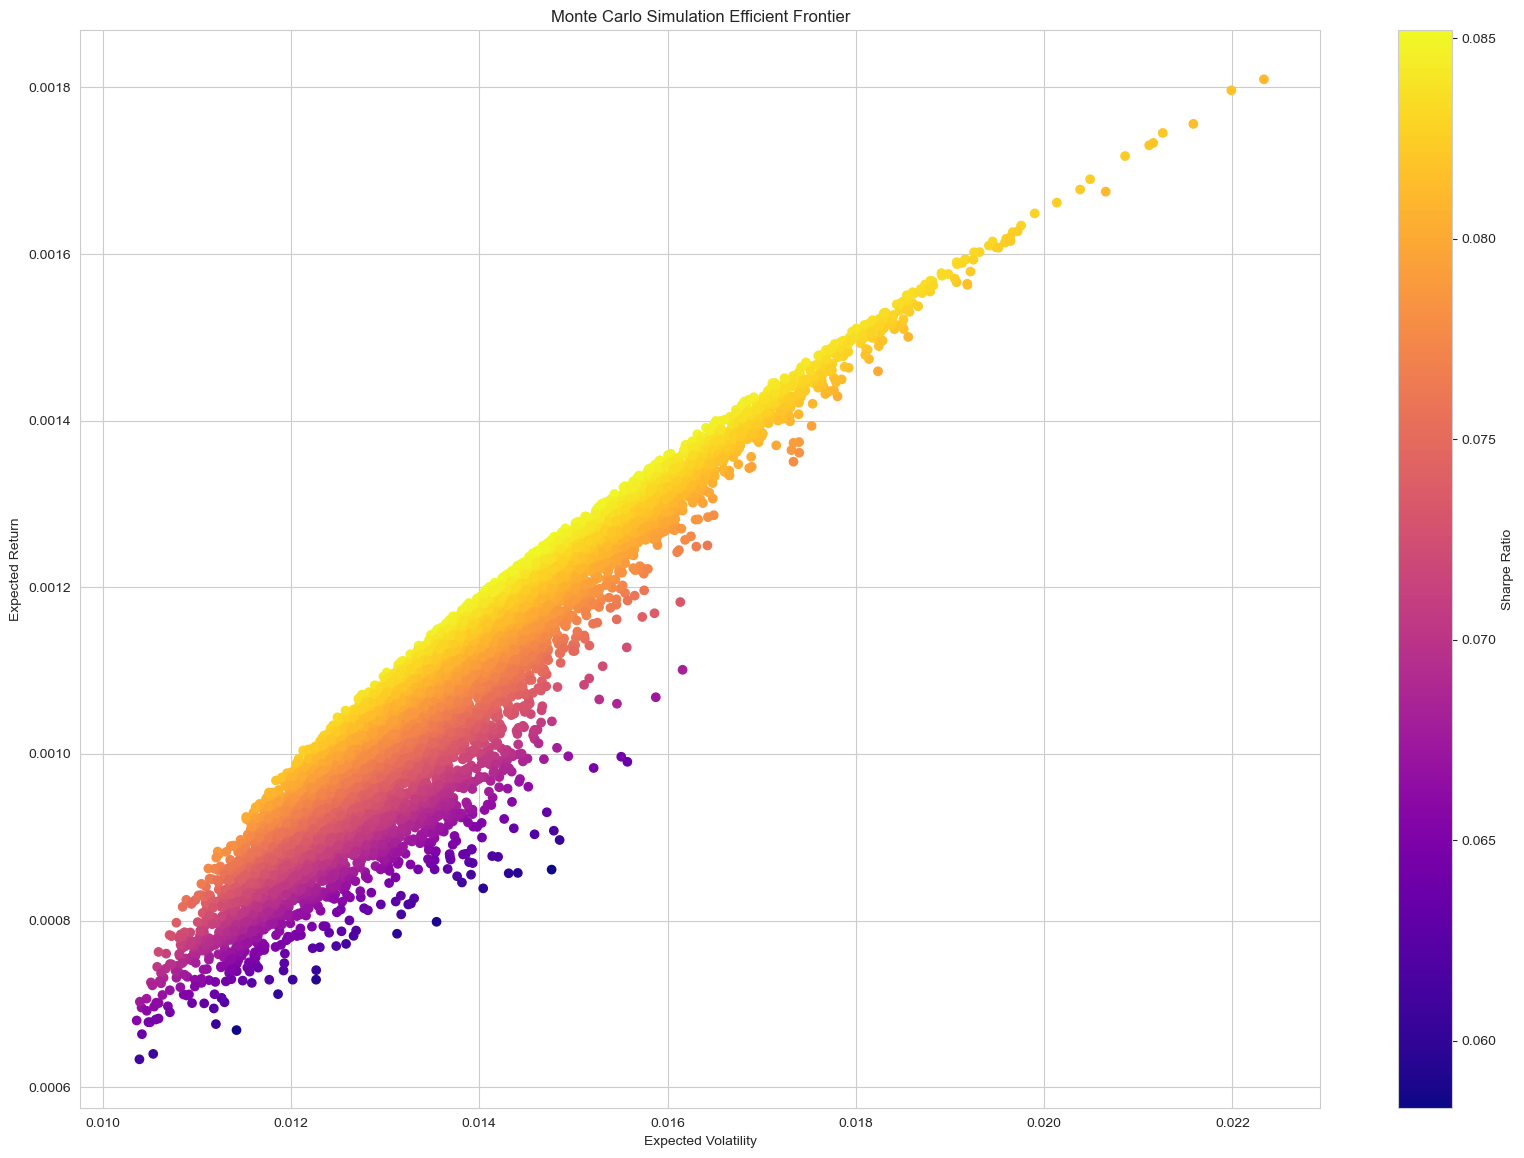

In [35]:
fig = plt.figure(figsize = (20,14))

plt.scatter(portfolio_vols, portfolio_returns, c = portfolio_returns / portfolio_vols, marker = 'o',cmap='plasma')
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier')

plt.show();